In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive

In [ ]:
# Mount your Google Drive where the 'asteroid' folder is located
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to the CSV file on your Google Drive
file_path = '/content/drive/MyDrive/asteroid.csv'

In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

<ipython-input-5-928cceda4ca5>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
pd.set_option('display.max_columns', None)
data.head(10) #looking at the structure of the data

,spkid,full_name,name,neo,pha,sats,H,diameter,albedo,moid,epoch,e,a,q,i,om,w,ma,ad,n,tp,per_y,class
0,20000001,1 Ceres (A801 AA),Ceres,N,N,0,3.33,939.400,0.0900,1.580,2460200.5,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,2459919.90,4.60,MBA
1,20000002,2 Pallas (A802 FA),Pallas,N,N,0,4.12,513.000,0.1550,1.230,2460200.5,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,2460010.59,4.61,MBA
2,20000003,3 Juno (A804 RA),Juno,N,N,0,5.16,246.596,0.2140,1.040,2460200.5,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,2460036.68,4.36,MBA
3,20000004,4 Vesta (A807 FA),Vesta,N,N,0,3.22,525.400,0.4228,1.140,2460200.5,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,2459576.79,3.63,MBA
4,20000005,5 Astraea (A845 XA),Astraea,N,N,0,7.00,106.699,0.2740,1.110,2460200.5,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,2460438.06,4.14,MBA
5,20000006,6 Hebe (A847 NA),Hebe,N,N,0,5.61,185.180,0.2679,0.975,2460200.5,0.2027,2.426,1.934,14.74,138.64,239.59,144.00,2.92,0.2609,2459648.55,3.78,MBA
6,20000007,7 Iris (A847 PA),Iris,N,N,0,5.64,199.830,0.2766,0.850,2460200.5,0.2298,2.387,1.838,5.52,259.50,145.44,207.90,2.94,0.2673,2460769.53,3.69,MBA
7,20000008,8 Flora (A847 UA),Flora,N,N,0,6.61,147.491,0.2260,0.873,2460200.5,0.1565,2.201,1.857,5.89,110.86,285.60,317.29,2.55,0.3018,2460342.03,3.27,MBA
8,20000009,9 Metis (A848 HA),Metis,N,N,0,6.32,190.000,0.1180,1.110,2460200.5,0.1231,2.387,2.093,5.58,68.87,5.75,345.43,2.68,0.2673,2460255.01,3.69,MBA
9,20000010,10 Hygiea (A849 GA),Hygiea,N,N,0,5.64,407.120,0.0717,1.780,2460200.5,0.1110,3.140,2.791,3.83,283.17,312.48,75.18,3.49,0.1771,2459776.10,5.56,MBA


In [ ]:
data.shape #shape of the data set

(139631, 23)

In [ ]:
#Dropping rows with no dimaeter values (target)
data = data.dropna(subset=['diameter'])

In [ ]:
data.shape #shape of the data set

(139631, 23)

In [ ]:
for col in data.columns:
    print(col, 100-data[col].isna().sum()/data.shape[0]*100) #Fraction of values missing in each column

spkid 100.0
full_name 100.0
name 11.904949473970689
neo 100.0
pha 100.0
sats 100.0
H 99.46215381971052
diameter 100.0
albedo 99.1907241228667
moid 100.0
epoch 100.0
e 100.0
a 100.0
q 100.0
i 100.0
om 100.0
w 100.0
ma 100.0
ad 100.0
n 100.0
tp 100.0
per_y 100.0
class 100.0


In [ ]:
data.isnull().sum(axis=1).value_counts() #Number of rows with no data in any column


1    121212
0     16604
2      1768
3        47
dtype: int64

In [ ]:
# Drop the 'spkid' and 'name' columns
columns_to_drop = ['spkid', 'name']
data = data.drop(columns=columns_to_drop)

In [ ]:
data.shape

(139631, 21)

In [ ]:
data.dtypes #Type of data

full_name     object
neo           object
pha           object
sats           int64
H            float64
diameter     float64
albedo       float64
moid         float64
epoch        float64
e            float64
a            float64
q            float64
i            float64
om           float64
w            float64
ma           float64
ad           float64
n            float64
tp           float64
per_y        float64
class         object
dtype: object

In [ ]:

#Identifying number of uniques classes in parameters with object-type data
print(data['class'].unique(), len(data['class'].unique()))

['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO'] 11


<Axes: ylabel='Frequency'>

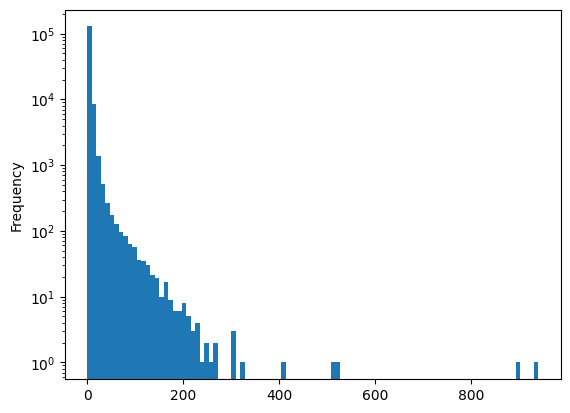

In [ ]:
data['diameter'].plot.hist(bins=100, logy=True) #Distribution of diameters in the data set


In [ ]:
for each in data['neo'].unique():
    print(each, (data['neo']==each).sum()) #Number of NEOs

N 138383
Y 1248


In [ ]:
for each in data['pha'].unique():
    print(each, (data['pha']==each).sum()) #Number of PHAs

N 139290
Y 341


<Axes: ylabel='Frequency'>

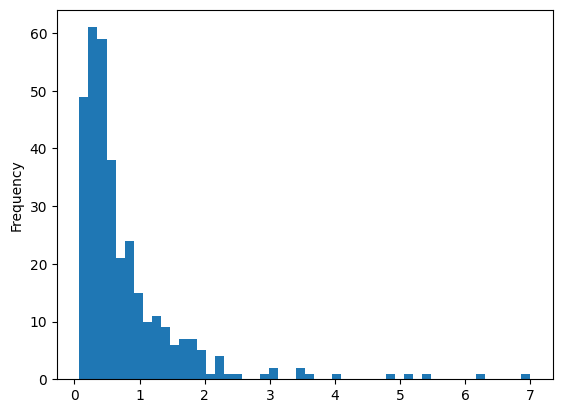

In [ ]:
data1 = data[data['pha']=='Y']
data1['diameter'].plot.hist(bins=50) #Distribution of diameters of Potentially Hazardous Asteroids

In [ ]:
data.loc[(data['diameter'] > 3) & (data['pha']=='Y')] #Potentially hazardous and big asteroids


,full_name,neo,pha,sats,H,diameter,albedo,moid,epoch,e,a,q,i,om,w,ma,ad,n,tp,per_y,class
1940,1981 Midas (1973 EA),Y,Y,0,15.28,3.400,NaN,0.00314,2460200.5,0.6501,1.777,0.622,39.82,356.85,267.82,92.26,2.93,0.4162,2459978.82,2.37,APO
3005,3122 Florence (1981 ET3),Y,Y,2,14.10,4.900,0.2310,0.04450,2460200.5,0.4231,1.769,1.020,22.14,336.06,27.88,193.13,2.52,0.4189,2460598.84,2.35,AMO
3076,3200 Phaethon (1983 TB),Y,Y,0,14.40,6.250,0.1066,0.01960,2460200.5,0.8900,1.271,0.140,22.29,265.15,322.24,334.02,2.40,0.6877,2460238.28,1.43,APO
3833,4015 Wilson-Harrington (1979 VA),Y,Y,0,16.18,4.000,0.0500,0.04270,2460200.5,0.6316,2.625,0.967,2.80,266.76,95.47,89.08,4.28,0.2318,2459816.15,4.25,APO
3985,4179 Toutatis (1989 AC),Y,Y,0,15.31,5.400,0.4050,0.00653,2460200.5,0.6247,2.544,0.955,0.45,125.34,277.87,242.54,4.13,0.2429,2460684.11,4.06,APO
3989,4183 Cuno (1959 LM),Y,Y,0,14.18,3.651,0.0970,0.02840,2460200.5,0.6360,1.981,0.721,6.67,294.35,237.04,34.47,3.24,0.3535,2460102.97,2.79,APO
37089,53319 (1999 JM8),Y,Y,0,15.36,7.000,NaN,0.02550,2460200.5,0.6415,2.723,0.976,13.84,133.62,166.82,140.97,4.47,0.2193,2459557.70,4.49,APO
52735,85713 (1998 SS49),Y,Y,0,15.78,3.484,0.0760,0.00468,2460200.5,0.6386,1.924,0.695,10.78,40.96,103.14,91.75,3.15,0.3694,2459952.15,2.67,APO
54375,89830 (2002 CE),Y,Y,0,15.00,5.067,0.0790,0.02780,2460200.5,0.5072,2.078,1.024,43.66,19.90,5.82,121.68,3.13,0.3291,2459830.78,2.99,AMO
62909,111253 (2001 XU10),Y,Y,0,15.28,3.006,0.1780,0.02970,2460200.5,0.4394,1.754,0.983,42.02,310.16,6.96,252.48,2.52,0.4244,2460453.85,2.32,APO


explanatory data analysis

In [ ]:
def dist(par):
    data[par].hist(bins=100) #Distribution of parameter
    print('Data available for (%):', 100-data[par].isna().sum()/data.shape[0]*100) #Amount of data available
    print('Mean:', data[par].mean()) #Mean of parameter
    print('Range:', data[par].min(), data[par].max()) #Range of parameter

Data available for (%): 99.46215381971052
Mean: 15.353168562788017
Range: 3.22 29.9


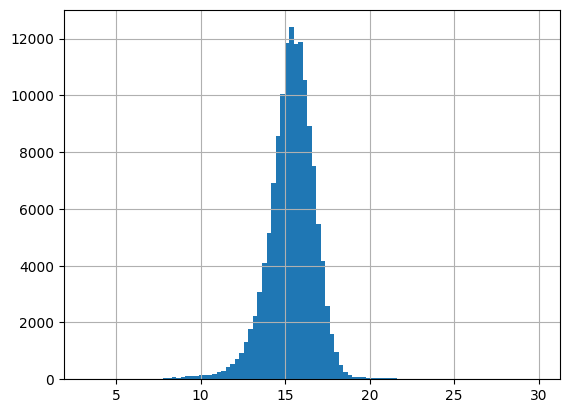

In [ ]:
dist('H')

In [ ]:
data['class'].value_counts() #Number of asteroids in each class


MBA    127552
OMB      7789
TJN      1879
APO       772
MCA       599
IMB       483
AMO       347
ATE       129
CEN        55
AST        13
TNO        13
Name: class, dtype: int64

correlation matrix

In [ ]:
df = data.dropna(axis=1)
df.drop(['neo', 'pha', 'class'], axis = 1) #These features are based on other features and are just representat

,full_name,sats,diameter,moid,epoch,e,a,q,i,om,w,ma,ad,n,tp,per_y
0,1 Ceres (A801 AA),0,939.400,1.580,2460200.5,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,2459919.90,4.60
1,2 Pallas (A802 FA),0,513.000,1.230,2460200.5,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,2460010.59,4.61
2,3 Juno (A804 RA),0,246.596,1.040,2460200.5,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,2460036.68,4.36
3,4 Vesta (A807 FA),0,525.400,1.140,2460200.5,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,2459576.79,3.63
4,5 Astraea (A845 XA),0,106.699,1.110,2460200.5,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,2460438.06,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139626,(2019 AR40),0,1.870,1.110,2460200.5,0.2463,2.742,2.066,13.47,302.92,253.64,319.01,3.42,0.2171,2460389.27,4.54
139627,(2019 BY5),0,2.182,0.984,2460200.5,0.2962,2.717,1.912,16.56,122.93,297.24,47.98,3.52,0.2201,2459982.49,4.48
139628,(2019 BX6),0,1.688,1.050,2460200.5,0.2419,2.680,2.032,16.73,38.90,26.01,58.27,3.33,0.2247,2459941.15,4.39
139629,(2019 BB7),0,2.887,1.360,2460200.5,0.1598,2.788,2.342,8.65,74.58,117.06,311.64,3.23,0.2117,2460428.88,4.65


In [ ]:
corr = df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-25-5d270a6ec676>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


,sats,diameter,moid,epoch,e,a,q,i,om,w,ma,ad,n,tp,per_y
sats,1.000000,0.079902,0.032076,0.003004,0.022922,0.008744,0.034297,0.008859,0.002419,0.005402,0.003050,0.003576,0.070221,0.003186,0.000534
diameter,0.079902,1.000000,0.330464,0.028765,0.064356,0.128879,0.327143,0.051879,0.000883,0.003004,0.008941,0.081473,0.186973,0.041022,0.043598
moid,0.032076,0.330464,1.000000,0.047392,0.511760,0.333264,0.996127,0.127702,0.003719,0.005971,0.055658,0.186447,0.667713,0.086798,0.099429
epoch,0.003004,0.028765,0.047392,1.000000,0.025560,0.000658,0.052194,0.098807,0.009906,0.000963,0.000318,0.007733,0.062180,0.565001,0.009184
e,0.022922,0.064356,0.511760,0.025560,1.000000,0.022334,0.542120,0.178189,0.002980,0.011201,0.001146,0.110686,0.216009,0.029698,0.050312
a,0.008744,0.128879,0.333264,0.000658,0.022334,1.000000,0.329488,0.141686,0.000264,0.000764,0.026874,0.988340,0.248747,0.084478,0.948416
q,0.034297,0.327143,0.996127,0.052194,0.542120,0.329488,1.000000,0.085419,0.003023,0.006189,0.053884,0.181890,0.685338,0.081267,0.097663
i,0.008859,0.051879,0.127702,0.098807,0.178189,0.141686,0.085419,1.000000,0.011927,0.005028,0.039284,0.133793,0.119172,0.107477,0.089280
om,0.002419,0.000883,0.003719,0.009906,0.002980,0.000264,0.003023,0.011927,1.000000,0.106533,0.001066,0.000211,0.005792,0.007972,0.000195
w,0.005402,0.003004,0.005971,0.000963,0.011201,0.000764,0.006189,0.005028,0.106533,1.000000,0.002247,0.000201,0.003349,0.004622,0.000269


In [ ]:
data.shape

(139631, 21)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder_bin = OrdinalEncoder() #Binary encoder for NEO and PHA

neo = data['neo'].values
pha = data['pha'].values

encoder_bin.fit(neo.reshape(-1,1))

print(encoder_bin.categories_)

neo = encoder_bin.transform(neo.reshape(-1,1))
pha = encoder_bin.transform(pha.reshape(-1,1))

[array(['N', 'Y'], dtype=object)]


In [ ]:
data = data.drop(['neo', 'pha'], axis = 1)

In [ ]:
data = data.assign(neo=neo)
data = data.assign(pha=pha) #Adding updated columns

In [ ]:
data = data.drop(['full_name'], axis = 1) #Not required for models

In [ ]:
#Encoder for asteroid orbit class
encoder_class = OrdinalEncoder()

ast_class = data['class'].values

encoder_class.fit(ast_class.reshape(-1,1))

print(encoder_class.categories_)

ast_class = encoder_class.transform(ast_class.reshape(-1,1))

[array(['AMO', 'APO', 'AST', 'ATE', 'CEN', 'IMB', 'MBA', 'MCA', 'OMB',
       'TJN', 'TNO'], dtype=object)]


In [ ]:
data = data.drop(['class'], axis = 1)
data = data.assign(ast_class=ast_class)

In [ ]:
data

,sats,H,diameter,albedo,moid,epoch,e,a,q,i,om,w,ma,ad,n,tp,per_y,neo,pha,ast_class
0,0,3.33,939.400,0.0900,1.580,2460200.5,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,2459919.90,4.60,0.0,0.0,6.0
1,0,4.12,513.000,0.1550,1.230,2460200.5,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,2460010.59,4.61,0.0,0.0,6.0
2,0,5.16,246.596,0.2140,1.040,2460200.5,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,2460036.68,4.36,0.0,0.0,6.0
3,0,3.22,525.400,0.4228,1.140,2460200.5,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,2459576.79,3.63,0.0,0.0,6.0
4,0,7.00,106.699,0.2740,1.110,2460200.5,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,2460438.06,4.14,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139626,0,18.30,1.870,0.0730,1.110,2460200.5,0.2463,2.742,2.066,13.47,302.92,253.64,319.01,3.42,0.2171,2460389.27,4.54,0.0,0.0,6.0
139627,0,17.28,2.182,0.0540,0.984,2460200.5,0.2962,2.717,1.912,16.56,122.93,297.24,47.98,3.52,0.2201,2459982.49,4.48,0.0,0.0,6.0
139628,0,17.50,1.688,NaN,1.050,2460200.5,0.2419,2.680,2.032,16.73,38.90,26.01,58.27,3.33,0.2247,2459941.15,4.39,0.0,0.0,6.0
139629,0,17.00,2.887,0.1110,1.360,2460200.5,0.1598,2.788,2.342,8.65,74.58,117.06,311.64,3.23,0.2117,2460428.88,4.65,0.0,0.0,6.0


In [ ]:
# Check for NaN values in the entire DataFrame
nan_counts = data.isnull().sum()

In [ ]:
# Print the columns with NaN values
print("Columns with NaN values:")
print(nan_counts[nan_counts > 0])

Columns with NaN values:
H          751
albedo    1130
dtype: int64


In [ ]:
# Specify the columns with NaN values
columns_with_nan = ['H', 'albedo']

In [ ]:
# Drop rows with NaN values in the specified columns
data = data.dropna(subset=columns_with_nan)

In [ ]:
data

,sats,H,diameter,albedo,moid,epoch,e,a,q,i,om,w,ma,ad,n,tp,per_y,neo,pha,ast_class
0,0,3.33,939.400,0.0900,1.580,2460200.5,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,2459919.90,4.60,0.0,0.0,6.0
1,0,4.12,513.000,0.1550,1.230,2460200.5,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,2460010.59,4.61,0.0,0.0,6.0
2,0,5.16,246.596,0.2140,1.040,2460200.5,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,2460036.68,4.36,0.0,0.0,6.0
3,0,3.22,525.400,0.4228,1.140,2460200.5,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,2459576.79,3.63,0.0,0.0,6.0
4,0,7.00,106.699,0.2740,1.110,2460200.5,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,2460438.06,4.14,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139625,0,16.30,5.091,0.0900,1.950,2460200.5,0.0522,3.095,2.933,15.55,315.39,300.05,178.20,3.26,0.1810,2459216.12,5.44,0.0,0.0,6.0
139626,0,18.30,1.870,0.0730,1.110,2460200.5,0.2463,2.742,2.066,13.47,302.92,253.64,319.01,3.42,0.2171,2460389.27,4.54,0.0,0.0,6.0
139627,0,17.28,2.182,0.0540,0.984,2460200.5,0.2962,2.717,1.912,16.56,122.93,297.24,47.98,3.52,0.2201,2459982.49,4.48,0.0,0.0,6.0
139629,0,17.00,2.887,0.1110,1.360,2460200.5,0.1598,2.788,2.342,8.65,74.58,117.06,311.64,3.23,0.2117,2460428.88,4.65,0.0,0.0,6.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
target_column = 'diameter'

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1)  # Output layer
])

In [ ]:
# Compile the model with a lower learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2756/2756 [==============================] - 7s 2ms/step - loss: 22.0947 - val_loss: 22.5199
Epoch 2/50
2756/2756 [==============================] - 6s 2ms/step - loss: 10.2395 - val_loss: 7.7015
Epoch 3/50
2756/2756 [==============================] - 6s 2ms/step - loss: 7.3516 - val_loss: 8.8100
Epoch 4/50
2756/2756 [==============================] - 6s 2ms/step - loss: 6.4410 - val_loss: 5.7899
Epoch 5/50
2756/2756 [==============================] - 7s 3ms/step - loss: 5.5461 - val_loss: 5.2505
Epoch 6/50
2756/2756 [==============================] - 6s 2ms/step - loss: 4.7505 - val_loss: 4.6760
Epoch 7/50
2756/2756 [==============================] - 6s 2ms/step - loss: 4.7909 - val_loss: 7.9156
Epoch 8/50
2756/2756 [==============================] - 7s 3ms/step - loss: 4.2362 - val_loss: 5.3270
Epoch 9/50
2756/2756 [==============================] - 6s 2ms/step - loss: 3.8967 - val_loss: 13.6703
Epoch 10/50
2756/2756 [==============================] - 5s 2ms/step - loss: 3

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print("Test loss:", loss)

862/862 [==============================] - 1s 1ms/step - loss: 14.0275
Test loss: 14.027502059936523


In [ ]:
import matplotlib.pyplot as plt

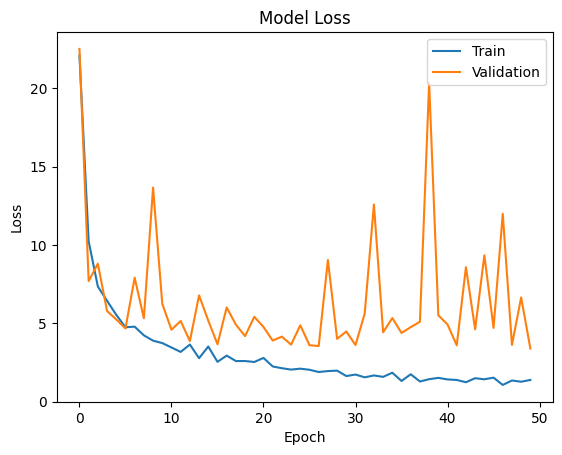

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

feature importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train_scaled is your training feature data
# and y_train is your target data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

feature_importances = model.feature_importances_
feature_names = X.columns  # Assuming X is your DataFrame of features

# Create a sorted list of feature names and importances
sorted_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Print the most important features
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

H: 0.8818
albedo: 0.0990
i: 0.0030
ad: 0.0025
om: 0.0024
ma: 0.0019
w: 0.0018
q: 0.0015
tp: 0.0015
e: 0.0014
moid: 0.0010
n: 0.0009
a: 0.0006
per_y: 0.0005
sats: 0.0001
ast_class: 0.0001
neo: 0.0000
epoch: 0.0000
pha: 0.0000
